# Logistic Reg on Telco-Customer Churn dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [4]:
df=pd.read_csv("C:\\Users\\spoor\\Downloads\\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


In [7]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop missing values
df.dropna(inplace=True)

# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)


In [8]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [9]:
df = pd.get_dummies(df, drop_first=True)


In [10]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [11]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7874911158493249


In [15]:
sample_customer = X_test[0].reshape(1, -1)
probability = model.predict_proba(sample_customer)[0][1]

print("Churn Probability:", round(probability * 100, 2), "%")


Churn Probability: 0.58 %


use the model to classify customers into...likely to churn and likely to stay

In [16]:
# Predict churn probability for test data
y_prob = model.predict_proba(X_test)[:, 1]
print(y_prob)

[0.00575411 0.12604418 0.68118717 ... 0.09609863 0.26400179 0.00215415]


In [17]:
threshold = 0.5

y_class = (y_prob >= threshold).astype(int)

In [18]:
labels = ["Likely to Stay", "Likely to Churn"]

customer_status = [labels[i] for i in y_class]

In [19]:
results = pd.DataFrame({
    "Actual_Churn": y_test.values,
    "Churn_Probability": y_prob,
    "Predicted_Class": y_class,
    "Customer_Status": customer_status
})

results.head()


,Actual_Churn,Churn_Probability,Predicted_Class,Customer_Status
0,0,0.005754,0,Likely to Stay
1,0,0.126044,0,Likely to Stay
2,1,0.681187,1,Likely to Churn
3,0,0.117433,0,Likely to Stay
4,0,0.359167,0,Likely to Stay


In [20]:
results["Customer_Status"].value_counts()


Customer_Status
Likely to Stay     1096
Likely to Churn     311
Name: count, dtype: int64

predict the churn outcome for unseen customer records

In [21]:
new_customer = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "Yes",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 85.5,
    "TotalCharges": 420.75
}


In [22]:
new_df = pd.DataFrame([new_customer])


In [23]:
new_df_encoded = pd.get_dummies(new_df)

# Align columns with training data
new_df_encoded = new_df_encoded.reindex(columns=X.columns, fill_value=0)


In [24]:
new_df_scaled = scaler.transform(new_df_encoded)


In [25]:
churn_probability = model.predict_proba(new_df_scaled)[0][1]


In [26]:
threshold = 0.5  # can be adjusted

churn_prediction = "Likely to Churn" if churn_probability >= threshold else "Likely to Stay"


In [27]:
print("Churn Probability:", round(churn_probability * 100, 2), "%")
print("Prediction:", churn_prediction)


Churn Probability: 80.24 %
Prediction: Likely to Churn


evaluate performance with metrics

In [28]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[915, 118],
       [181, 193]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



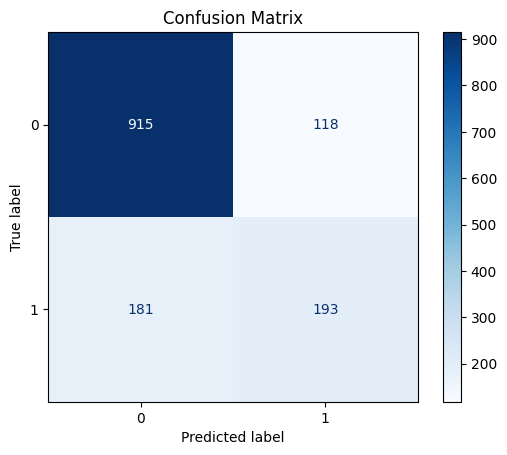

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix")
plt.show()